<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/12_Machine_Learning_for_Time_Series_Data_in_Python/03_Predicting_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Predicting Time Series Data

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/prices3.csv"
# Read the CSV file
prices = pd.read_csv(url)
display(prices.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/height_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
height_df = pd.read_csv(url)
display(height_df.head())

,date,EBAY,YHOO
0,2010-01-04,23.900000,17.100000
1,2010-01-05,23.650000,17.230000
2,2010-01-06,23.500000,17.170000
3,2010-01-07,23.229998,16.700001
4,2010-01-08,23.509999,16.700001


,weight_kg,height_1,height_2,height_3,height
0,81.5,1.78,1.80,1.80,1.793333
1,72.6,1.70,1.70,1.69,1.696667
2,92.9,1.74,1.75,1.73,1.740000
3,79.4,1.66,1.68,1.67,1.670000
4,94.6,1.91,1.93,1.90,1.913333


**Introducing the dataset**  
As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

The data has been loaded into a DataFrame called prices.

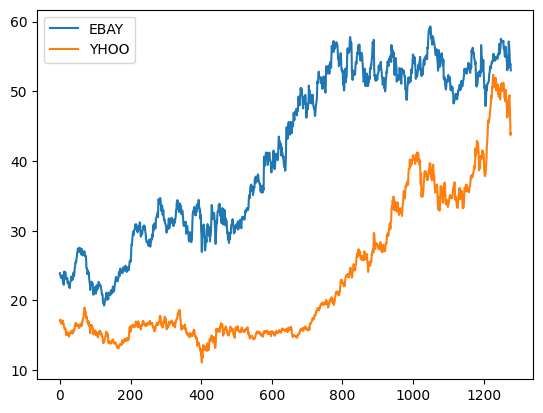

In [7]:
# Plot the raw values over time
prices.plot()
plt.show()

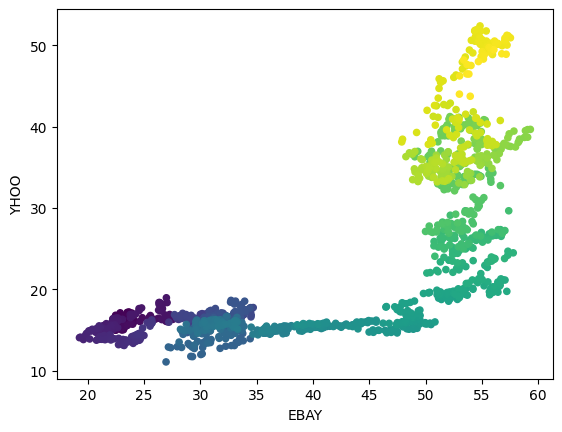

In [8]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index,
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

# As you can see, these two time series seem somewhat related to each other, though its a complex relationship that changes over time.

**Fitting a simple regression model**  
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

    ebay: "EBAY"
    nvidia: "NVDA"
    yahoo: "YHOO"
    apple: "AAPL"
We'll use these columns to define the input/output arrays in our model.

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/prices4.csv"
# Read the CSV file
all_prices = pd.read_csv(url)
display(all_prices.head())

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]


# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)

print(scores)

# As you can see, fitting a model with raw data doesn't give great results.

,date,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
0,2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
1,2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2,2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
3,2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
4,2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


[-6.09050633 -0.3179172  -3.72957284]


**Visualizing predicted values**  
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

            AAPL
0     214.009998
1     214.379993
2     210.969995
3     210.580000
4     211.980005
...          ...
1273  113.099998
1274  109.139999
1275  115.309998
1276  118.900002
1277  117.160004

[1278 rows x 1 columns]
-5.709399019485097


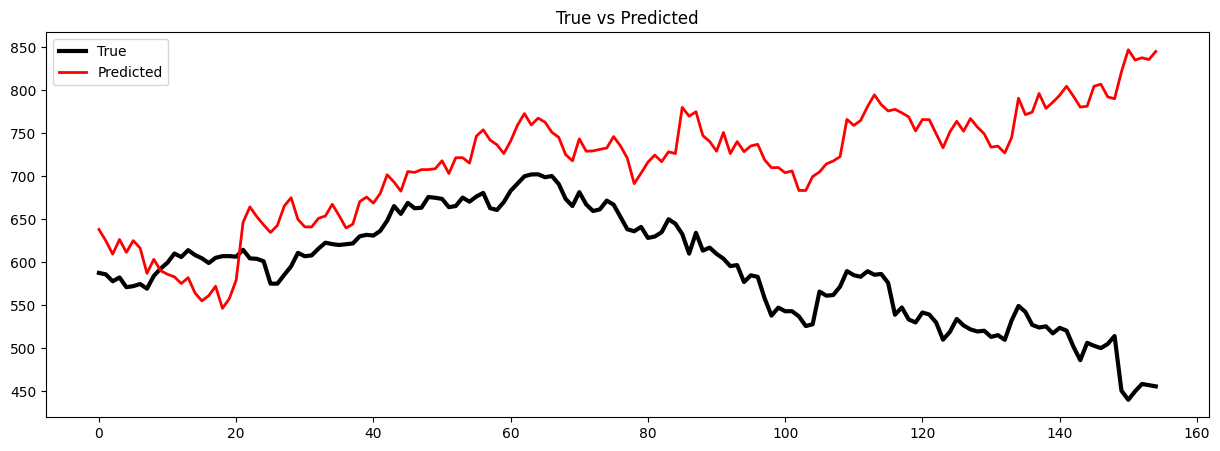

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:775,:], y[:775],
                                                    train_size=0.8, shuffle=False)
print(y)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.array(y_test), color='k', lw=3, label='True')
ax.plot(np.array(predictions), color='r', lw=2, label='Predicted')   #try removing np array
ax.set_title("True vs Predicted")
ax.legend()
plt.show()

# Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.

Visualizing Messy Data

**Visualizing messy data**  
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called prices

,date,EBAY,NVDA,YHOO
0,2010-01-04,23.900000,18.490000,17.100000
1,2010-01-05,23.650000,18.760000,17.230000
2,2010-01-06,23.500000,18.879999,17.170000
3,2010-01-07,23.229998,18.510000,16.700001
4,2010-01-08,23.509999,18.549999,16.700001


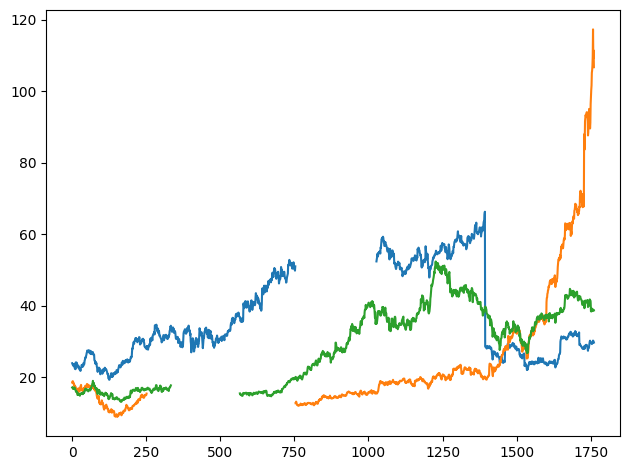

date      0
EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [26]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/prices_raw.csv"
# Read the CSV file
prices = pd.read_csv(url)
display(prices.head())

# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

#  In the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data. How can you deal with this?

**Imputing missing values**  
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

A single time series has been loaded into a DataFrame called prices.

In [27]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)

    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

/tmp/ipython-input-27-2517919829.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  prices_interp = prices.interpolate(interpolation)


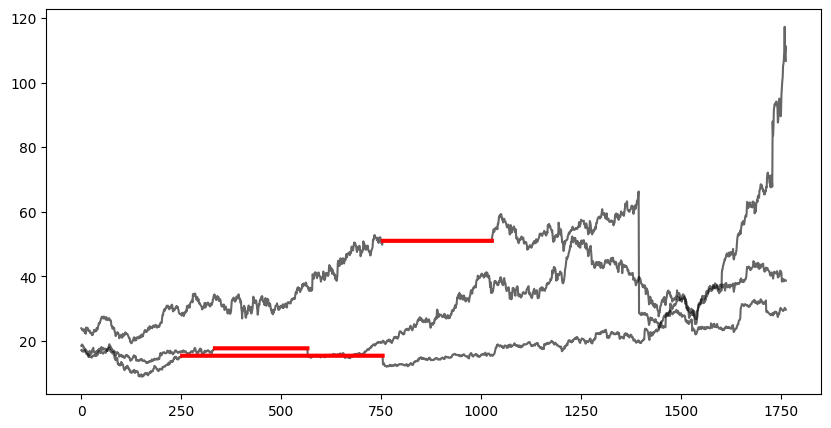

In [28]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

/tmp/ipython-input-27-2517919829.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  prices_interp = prices.interpolate(interpolation)


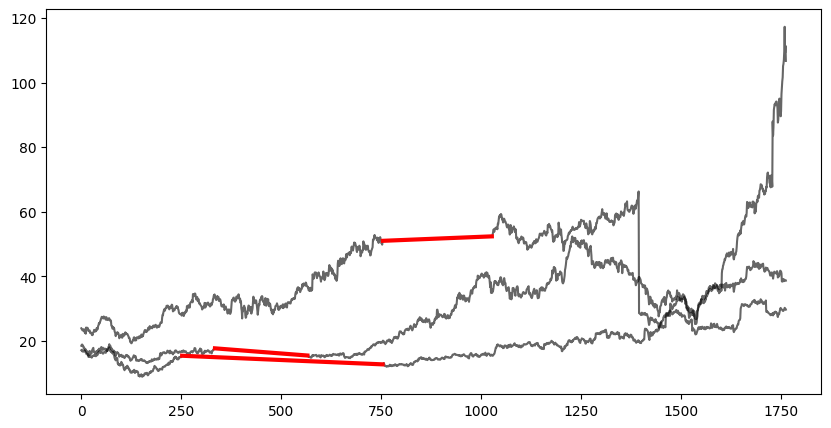

In [29]:
# Interpolate linearly
interpolation_type = "linear"
interpolate_and_plot(prices, interpolation_type)

/tmp/ipython-input-27-2517919829.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  prices_interp = prices.interpolate(interpolation)


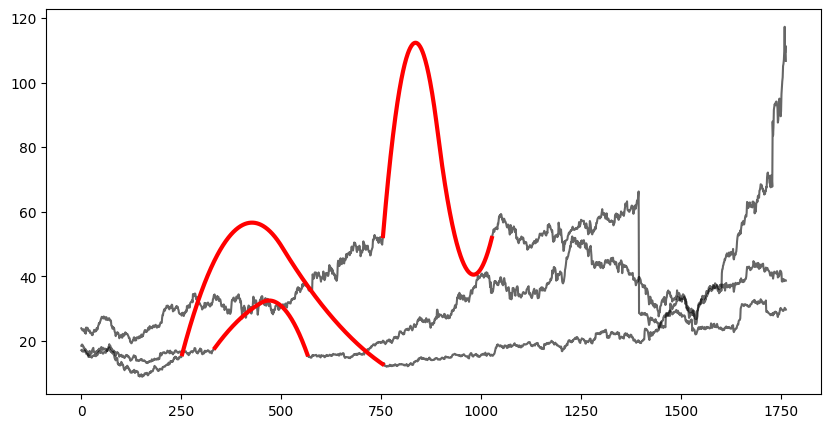

In [30]:
# Interpolate with a quadratic function
interpolation_type = "quadratic"
interpolate_and_plot(prices, interpolation_type)

# When you interpolate, the pre-existing data is used to infer the values of missing data.
#  As you can see, the method you use for this has a big effect on the outcome.

**Transforming raw data**  
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

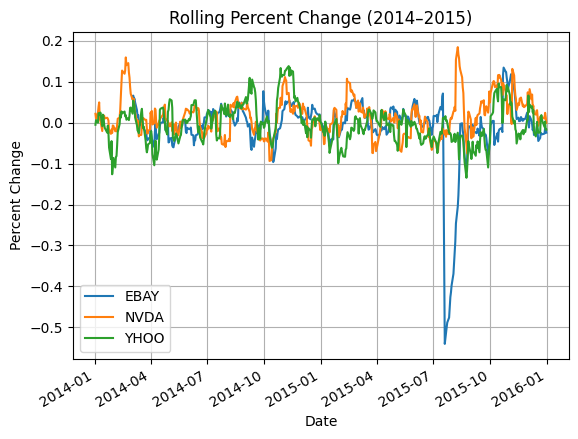

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices["date"] = pd.to_datetime(prices["date"])
prices.set_index("date", inplace=True)


# Define function with iloc
def percent_change(series):
    previous_values = series.iloc[:-1]
    last_value = series.iloc[-1]
    return (last_value - np.mean(previous_values)) / np.mean(previous_values)

# Assuming 'prices' is a Pandas Series with DateTime index
prices_perc = prices.rolling(20).aggregate(percent_change)

# Plot for specific time range
prices_perc.loc["2014":"2015"].plot()
plt.title("Rolling Percent Change (2014–2015)")
plt.ylabel("Percent Change")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# You've converted the data so it's easier to compare one time point to another. This is a cleaner representation of the data.


**Handling outliers**  
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

- Define a function that takes an input series and does the following:
 - Calculates the absolute value of each datapoint's distance from the series mean, then creates a boolean mask for datapoints that are three times the standard deviation from the mean.
 - Use this boolean mask to replace the outliers with the median of the entire series.
- Apply this function to your data and visualize the results using the given code.

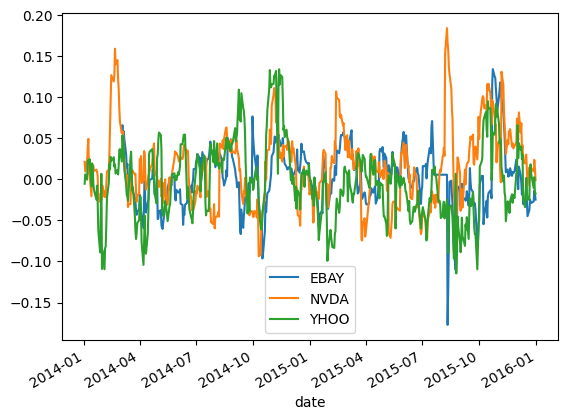

In [49]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)

    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

#  Since you've converted the data to % change over time, it was easier to spot and correct the outliers.

### Creating features over time

**Engineering multiple rolling features at once**  
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

/tmp/ipython-input-52-1452724407.py:8: FutureWarning: The provided callable <function min at 0x7fd1aa12d8a0> is currently using Rolling.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
/tmp/ipython-input-52-1452724407.py:8: FutureWarning: The provided callable <function max at 0x7fd1aa12d760> is currently using Rolling.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
/tmp/ipython-input-52-1452724407.py:8: FutureWarning: The provided callable <function mean at 0x7fd1aa12e160> is currently using Rolling.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = prices_perc_rolling.aggregate(fea

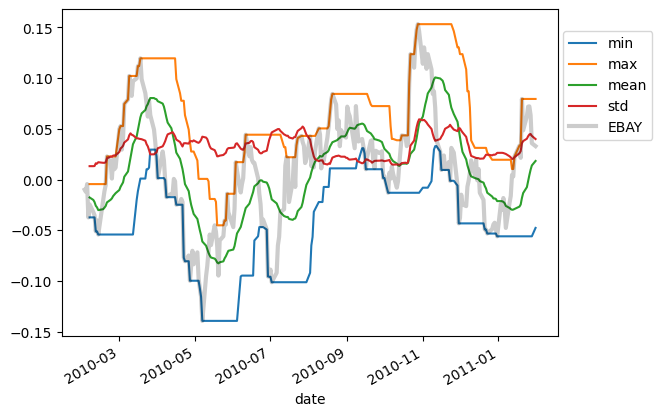

In [52]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc["EBAY"].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc["EBAY"].loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

**Percentiles and partial functions**   
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.

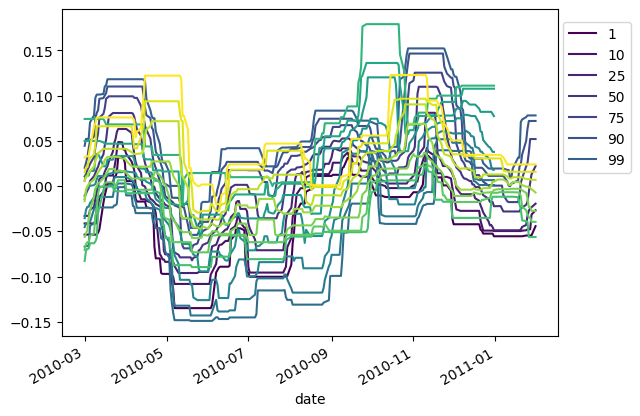

In [53]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

**Using "date" information**  
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

- Calculate the day of the week, week number in a year, and month number in a year.
- Add each one as a column to the prices_perc DataFrame, under the names day_of_week, week_of_year and month_of_year, respectively.

In [56]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.isocalendar().week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                EBAY      NVDA      YHOO  day_of_week  week_of_year  \
date                                                                  
2010-01-04       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN            4             1   
...              ...       ...       ...          ...           ...   
2016-12-23  0.024842  0.147720 -0.038006            4            51   
2016-12-27  0.038030  0.014446 -0.027985            1            52   
2016-12-28  0.026925  0.117737 -0.029311            2            52   
2016-12-29  0.021850  0.129669 -0.028632            3            52   
2016-12-30  0.007285  0.068559 -0.026603            4            52   

            month_of_year  
date                       
2010-01-04          